# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime, timedelta
import gmaps

# Import API keys
from api_keys import api_key
from config import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

print (lat_lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build base query URL

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url_base = url + "appid=" + api_key + "&units=imperial"

# Set up lists to hold reponse info

lat = []
lon = []
temp = []
humidity = []
wind = []
clouds = []
city_id = []
city_name = []
country = []
date_time = []

# Loop through the list of cities and perform a request for data on each
for city in range(len(cities)):
    # Need a try loop as I was getting an error on the coordinate values (!)
    try:
        response = requests.get(query_url_base + "&q=" + cities[city]).json()
        city_id.append(response['id'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        date_time.append(time.strftime('%m/%d/%Y %H:%M:%S', time.localtime(response['dt'])))
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        print ('Processing City = ' + response['name'] + ' Id = ' + str(response['id']))
    except:
        continue
        
# Print the lenght of city_name array to see how many cities are left with no errors        
print (len(city_name))

Processing City = Punta Arenas Id = 3874787
Processing City = Geraldton Id = 5960603
Processing City = Killin Id = 4117436
Processing City = Butaritari Id = 2110227
Processing City = Ushuaia Id = 3833367
Processing City = Mataura Id = 6201424
Processing City = Albany Id = 5106834
Processing City = Moron Id = 3720455
Processing City = Hermanus Id = 3366880
Processing City = Dikson Id = 1507390
Processing City = Tabou Id = 2281120
Processing City = Cidreira Id = 3466165
Processing City = Hilo Id = 5855927
Processing City = Kavieng Id = 2094342
Processing City = Archidona Id = 3660573
Processing City = Gushikawa Id = 1863495
Processing City = Jamestown Id = 2069194
Processing City = Hasaki Id = 2112802
Processing City = Chulman Id = 2025261
Processing City = Saint-Philippe Id = 6138908
Processing City = Portland Id = 4975802
Processing City = Puerto Ayora Id = 3652764
Processing City = Magadan Id = 2123628
Processing City = Pisco Id = 3932145
Processing City = Airai Id = 1651810
Processin

Processing City = San Patricio Id = 3437029
Processing City = Avera Id = 4231997
Processing City = Trairi Id = 3386177
Processing City = Roros Id = 3141332
Processing City = Kahului Id = 5847411
Processing City = Rapid Valley Id = 5768244
Processing City = Santa Vitoria do Palmar Id = 3449747
Processing City = Ust-Omchug Id = 2120047
Processing City = Mecca Id = 104515
Processing City = High Rock Id = 3572189
Processing City = Otane Id = 2185329
Processing City = Korostyshiv Id = 704885
Processing City = Hope Id = 4115181
Processing City = Hambantota Id = 1244926
Processing City = Dourdan Id = 3020925
Processing City = Road Town Id = 3577430
Processing City = Hamilton Id = 5969785
Processing City = Mehamn Id = 778707
Processing City = Mumbwa Id = 904422
Processing City = Washington DC. Id = 4366164
Processing City = Ketchikan Id = 5554428
Processing City = Kozulka Id = 687093
Processing City = Rabo de Peixe Id = 3372745
Processing City = Port Lincoln Id = 2063036
Processing City = Rio 

Processing City = Quatre Cocos Id = 1106643
Processing City = Salta Id = 3838233
Processing City = Carballo Id = 3126369
Processing City = Dunedin Id = 2191562
Processing City = San Marcos Id = 3589805
Processing City = Ventspils Id = 454310
Processing City = Mount Gambier Id = 2156643
Processing City = Ponta do Sol Id = 3453439
Processing City = Stokmarknes Id = 3136690
Processing City = Rawson Id = 3839307
Processing City = Ayan Id = 117656
Processing City = Kirs Id = 548333
Processing City = Uusikaupunki Id = 633221
Processing City = Vorontsovka Id = 471909
Processing City = Columbus Id = 4509177
Processing City = Zhuhai Id = 2052479
Processing City = Kaitangata Id = 2208248
Processing City = Paungde Id = 1300969
Processing City = Havoysund Id = 779622
Processing City = Wakkanai Id = 2127515
Processing City = Isabela Id = 1710518
Processing City = Carutapera Id = 3402648
Processing City = Iskateley Id = 866062
Processing City = Gunjur Id = 2413419
Processing City = Tacoronte Id = 25

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame()
# add a coumn
df['ID']  = city_id
df['City'] = city_name
df['Country'] = country
df['Date_Time'] = date_time
df['Latitude'] = lat
df['Longitude'] = lon
df['Max_Temperature'] = temp
df['Humidity'] = humidity
df['Wind'] = wind
df['Clouds'] = clouds

df.to_csv(output_data_file, index=False)
df.head()

,ID,City,Country,Date_Time,Latitude,Longitude,Max_Temperature,Humidity,Wind,Clouds
0,3874787,Punta Arenas,CL,07/03/2019 23:08:33,-53.16,-70.91,23.00,92,3.36,40
1,5960603,Geraldton,CA,07/03/2019 23:08:34,49.72,-86.95,68.00,72,3.36,40
2,4117436,Killin,US,07/03/2019 23:08:34,33.61,-91.74,78.80,78,4.70,1
3,2110227,Butaritari,KI,07/03/2019 23:08:34,3.07,172.79,84.47,66,2.64,42
4,3833367,Ushuaia,AR,07/03/2019 23:06:23,-54.81,-68.31,23.00,67,8.05,0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

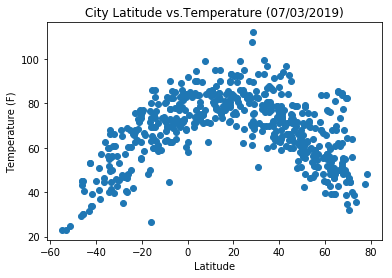

In [5]:
# Create scatter plot using the temp list - save today's date for all plots

today_date = ' (' + datetime.today().strftime('%m/%d/%Y') + ')'
plt.scatter(lat, temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Latitude vs.Temperature' + today_date)
plt.savefig('output_data/latitude_temperature.pdf')

#### Latitude vs. Humidity Plot

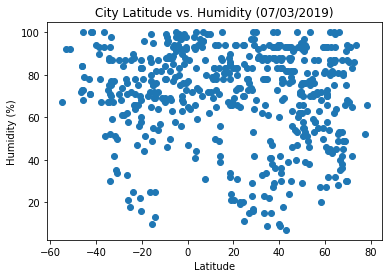

In [6]:
# Create scatter plot using the humidity list

#plt.scatter(lat, humidity, label='Latitude vs. Humidity', color='k', s=25, marker="o")
plt.scatter(lat, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity' + today_date)
plt.savefig('output_data/latitude_humidity.pdf')

#### Latitude vs. Cloudiness Plot

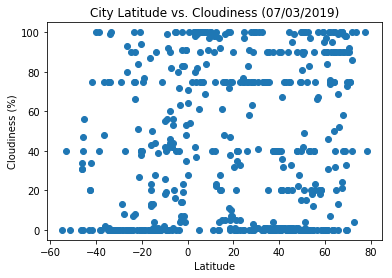

In [7]:
# Create scatter plot using the clouds list 

plt.scatter(lat, clouds)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness' + today_date)
plt.savefig('output_data/latitude_cloudiness.pdf')

#### Latitude vs. Wind Speed Plot

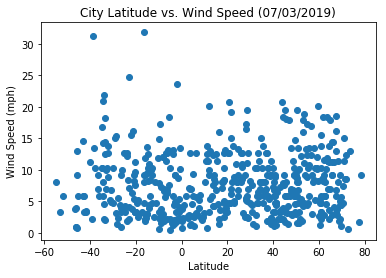

In [8]:
# Create scatter plot using the wind speed list 

plt.scatter(lat, wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed' + today_date)
plt.savefig('output_data/latitude_wind.pdf')

In [9]:
# Call gmaps to check the cities are randomly distributed

point_list = []
point_list = list(zip(df['Latitude'], df['Longitude']))

# Set up the Google Maps API Call

# Google developer API key
from config import gkey
import gmaps

gmaps.configure(api_key=gkey)

# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)



In [10]:
# Map using the marker layer

markers = gmaps.marker_layer(point_list)
fig = gmaps.figure(center=(0,0),zoom_level=1)
fig.add_layer(markers)
fig


Figure(layout=FigureLayout(height='420px'))

In [10]:
# Map using the symbol layer

symbol_layer = gmaps.symbol_layer(point_list, fill_color='green', stroke_color='green', scale=2)
fig = gmaps.figure(center=(0,0),zoom_level=1)
fig.add_layer(symbol_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
# Map using the heat layer

fig = gmaps.figure(center=(0,0),zoom_level=1)
fig.add_layer(gmaps.heatmap_layer(locations=point_list))
fig
# If you want to add a weight layer, just do this
#fig.add_layer(gmaps.heatmap_layer(locations=point_list,weights=weights,point_radius=20))

Figure(layout=FigureLayout(height='420px'))

## Conclusion

* Temparatures around the equator (Latitude 0) are overall higher than temperatures at very high latitude values (positive or negative). However, because we are in the summer month and we are in the Northern Temperature, the overall maximum average temperature is at about a Latiture of 20 Degrees.
* There are not differences in cloudiness or humidity based on the latitude of the location.
* There is very little difference in average wind speeds between the northern and the southern hemispheres However, there are now very large winds in some areas in the southern hemisfere.
